# <center >COVID-19 Analysis - Pakistan 2020</center>

The 2019–20 coronavirus pandemic was confirmed to have reached Pakistan on 26 February 2020, when a student in Karachi tested positive upon returning from Iran. By 18 March, cases had been registered in all four provinces, the two autonomous territories, and the federal territory of Islamabad. The dataset is completely acquired from NIH Publications, Governmental resources and extra mile contacts.

## Dataset Provided by:

- [Kaggle](https://www.kaggle.com) - [Corona Virus Pakistan Dataset 2020](https://www.kaggle.com/mesumraza/corona-virus-pakistan-dataset-2020/download)

<br>
Importing necessary libraries for analysis

In [1]:
from autoplotter import run_app
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
import datetime
from folium import plugins

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Prediction library
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

<br>
Reading the data from the .xlsx file

In [2]:
df = pd.read_excel("COVID-Data-2020/COVID_FINAL_DATA.xlsx")

In [3]:
covid_data = df
covid_data.head()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


In [4]:
covid_data.tail()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
638,8,10465,1030,10769,2020-06-12,673,15,294.0,76,GB,48,119
639,9,69806,6699,69806,2020-06-12,1164,65,5395.0,3766,ICT,75,3766
640,10,76035,15787,90470,2020-06-12,3907,632,10222.0,2398,KP,1026,3571
641,11,325091,47382,327072,2020-06-12,9546,890,34520.0,10116,Punjab,2426,9179
642,13,265698,46828,265698,2020-06-12,22047,776,22324.0,10081,Sindh,1681,10081


In [5]:
covid_data.shape

(643, 12)

In [6]:
covid_data.isnull().sum()

Unnamed: 0                             0
Cumulative                             0
Cumulative  Test positive              0
Cumulative  tests performed            0
Date                                   0
Discharged                             0
Expired                                0
Home Quarantine                      139
New  (last 24 hrs)                     0
Region                                 0
Still admitted                         0
Tests  performed in last 24 hours      0
dtype: int64

In [7]:
covid_data.columns

Index(['Unnamed: 0', 'Cumulative', 'Cumulative  Test positive',
       'Cumulative  tests performed', 'Date', 'Discharged', 'Expired',
       'Home Quarantine', 'New  (last 24 hrs)', 'Region', 'Still admitted',
       'Tests  performed in last 24 hours'],
      dtype='object')

In [8]:
covid_data = covid_data.drop('Unnamed: 0', axis = 1)
covid_data = covid_data.dropna()
covid_data.head()

,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
139,1067,43,1213,2020-03-29,2,0,30.0,157,ICT,11,0
140,3521,558,3492,2020-03-29,4,5,302.0,182,Punjab,247,0
141,5322,481,5673,2020-03-29,14,2,171.0,515,Sindh,294,0
142,928,188,1229,2020-03-29,2,4,122.0,108,KP,60,0
143,1601,138,1737,2020-03-29,2,1,5.0,136,Balochistan,130,0


In [9]:
covid_data.shape

(504, 11)

In [10]:
covid_data = covid_data[['Date','Region','Cumulative  Test positive','Expired','Discharged','New  (last 24 hrs)']]

covid_data.head(8)  #// 8 regions

,Date,Region,Cumulative Test positive,Expired,Discharged,New (last 24 hrs)
139,2020-03-29,ICT,43,0,2,157
140,2020-03-29,Punjab,558,5,4,182
141,2020-03-29,Sindh,481,2,14,515
142,2020-03-29,KP,188,4,2,108
143,2020-03-29,Balochistan,138,1,2,136
144,2020-03-29,AJK,2,0,0,7
145,2020-03-29,GB,116,1,4,1
146,2020-03-30,ICT,51,0,3,133


In [11]:
total_cases = covid_data['Cumulative  Test positive'].sum()
print('Total number of confirmed COVID 2019 cases across Pakistan till date (12th June, 2020):', total_cases)

Total number of confirmed COVID 2019 cases across Pakistan till date (12th June, 2020): 2297912


In [12]:
#Total Active  = test positive - (expired + discharged)

covid_data['Total Active'] = covid_data['Cumulative  Test positive'] - (covid_data['Expired'] + covid_data['Discharged'])
total_active = covid_data['Total Active'].sum()
print('Total number of active COVID-19 cases across Pakistan:', total_active)
Tot_Cases = covid_data.groupby('Region')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID-19 cases across Pakistan: 1503751


,Total Active
Region,
Punjab,613823
Sindh,506304
KP,210185
Balochistan,93662
ICT,63615
GB,12042
AJK,4120


<br> Adding Coordinate Data for Map Plotting

In [13]:
Pak_coord = pd.read_excel('COVID-Data-2020/Pakistan_Coords.xlsx')

df_full = pd.merge(Pak_coord,covid_data,on='Region')
df_full.head()

,Region,Latitude,Longitude,Date,Cumulative Test positive,Expired,Discharged,New (last 24 hrs),Total Active
0,Punjab,31.1704,72.7097,2020-03-29,558,5,4,182,549
1,Punjab,31.1704,72.7097,2020-03-30,593,6,5,95,582
2,Punjab,31.1704,72.7097,2020-03-31,652,9,5,154,638
3,Punjab,31.1704,72.7097,2020-04-01,708,9,5,692,694
4,Punjab,31.1704,72.7097,2020-04-02,845,11,6,624,828


In [14]:
Pakistan = [30.3753,69.3451]

map = folium.Map(location=Pakistan, zoom_start=5.5,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Total Active'], df_full['Region']):
    folium.CircleMarker([lat, lon], radius=value*0.003,color='red',fill_color='red',fill_opacity=1,opacity=0.3).add_to(map)
map

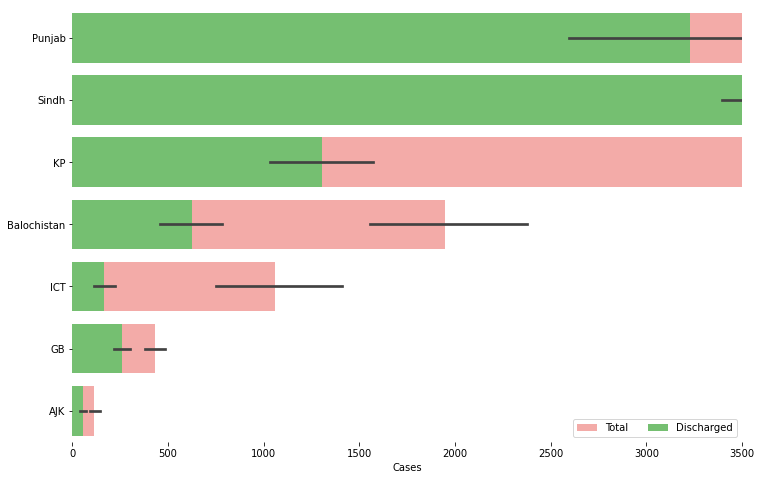

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
data = df_full[['Region','Cumulative  Test positive','Discharged','Expired']]
data.sort_values('Cumulative  Test positive',ascending=False,inplace=True)
data
sns.set_color_codes("pastel")
sns.barplot(x="Cumulative  Test positive", y="Region", data=data,label="Total", color="r")

sns.set_color_codes("muted")
sns.barplot(x="Discharged", y="Region", data=data, label="Discharged", color="g")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 3500), ylabel="",xlabel="Cases")
sns.despine(left=True, bottom=True)

<br> We need to remodel corona virus dataset through which we can extract all confirmed case values from all the regions of Pakistan from 11th March to 12th June.

In [16]:
Pak_df_dayByDay= pd.read_excel('COVID-Data-2020/COVID_FINAL_DATA.xlsx')
Pak_df_dayByDay.head()

,Unnamed: 0,Cumulative,Cumulative Test positive,Cumulative tests performed,Date,Discharged,Expired,Home Quarantine,New (last 24 hrs),Region,Still admitted,Tests performed in last 24 hours
0,4,48,2,80,2020-03-11,0,0,NaN,3,ICT,2,8
1,5,61,0,95,2020-03-11,0,0,NaN,6,Punjab,0,7
2,6,84,14,171,2020-03-11,1,0,NaN,1,Sindh,13,55
3,7,20,0,28,2020-03-11,0,0,NaN,0,KP,0,2
4,8,3,0,0,2020-03-11,0,0,NaN,0,KPTD,0,0


In [17]:
temp_total_date_Sindh = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Sindh')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_Punjab = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Punjab')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_Balochistan = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='Balochistan')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_ICT = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='ICT')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_KPK = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='KP')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_GB = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='GB')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

temp_total_date_KPTD = Pak_df_dayByDay[(Pak_df_dayByDay['Region']=='KPTD')].groupby(['Date']).agg({'Cumulative  Test positive':['sum']})

<br> Now Lets see how is the progression of COVID-19 amongst all Pakistani Cities.

In [18]:
Sindh = [i for i in temp_total_date_Sindh["Cumulative  Test positive"]['sum'].values]
Sindh_60 = Sindh[0:60]

Punjab = [i for i in temp_total_date_Punjab["Cumulative  Test positive"]['sum'].values]
Punjab_60 = Punjab[0:60]

Balochistan = [i for i in temp_total_date_Balochistan["Cumulative  Test positive"]['sum'].values]
Balochistan_60 = Balochistan[0:60]

ICT = [i for i in temp_total_date_ICT["Cumulative  Test positive"]['sum'].values]
ICT_60 = ICT[0:60]

KPK = [i for i in temp_total_date_KPK["Cumulative  Test positive"]['sum'].values]
KPK_60 = KPK[0:60]

GB = [i for i in temp_total_date_GB["Cumulative  Test positive"]['sum'].values]
GB_60 = GB[0:60]

<br>
Plotting the data for the progression of COVID-19

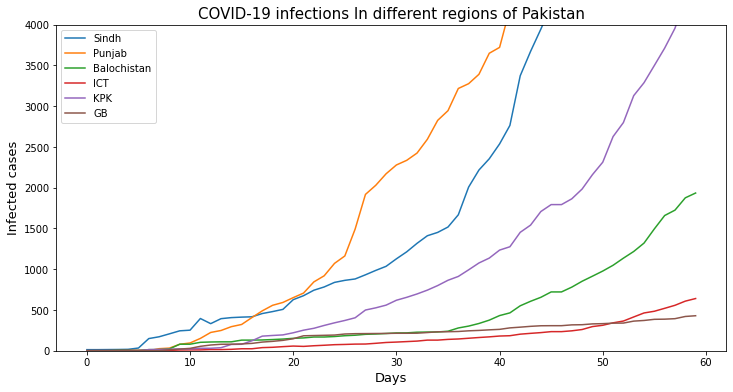

In [19]:
plt.figure(figsize=(12,6))

plt.plot(Sindh_60)
plt.plot(Punjab_60)
plt.plot(Balochistan_60)
plt.plot(ICT_60)
plt.plot(KPK_60)
plt.plot(GB_60)

plt.legend(["Sindh","Punjab","Balochistan","ICT","KPK","GB"], loc='upper left')
plt.title("COVID-19 infections In different regions of Pakistan", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 4000)
plt.show("png")

<br> As we can see the most rapid increase in COVID cases was in the Following Order:
   * Punjab
   * Sindh
   * KPK
   * Balochistan
   * ICT
   * GB

Now, we get the data region wise and plot charts for it.

In [20]:
Final_Data_Pak = pd.read_excel('COVID-Data-2020/Pakistan_Data_RegionWise.xlsx')
Final_Data_Pak.head()

,Date,Prv_Sindh_ConfimedCases,Prv_Sindh_NewCases,Prv_Punjab_ConfimedCases,Prv_Punjab_NewCases,Prv_Balochistan_ConfimedCases,Prv_Balochistan_NewCases,Prv_ICT_ConfimedCases,Prv_ICT_NewCases,Prv_GB_ConfimedCases,Prv_GB_NewCases,Prv_KP_ConfimedCases,Prv_KP_NewCases
0,2020-03-11,14,1,0,6,1,4,2,3,2,0,0,0
1,2020-03-12,14,5,0,6,1,4,2,4,3,0,0,4
2,2020-03-13,15,18,0,4,1,8,2,5,3,7,0,3
3,2020-03-14,16,12,0,6,6,14,3,5,3,6,0,2
4,2020-03-15,18,8,0,6,6,0,4,3,3,0,0,1


In [21]:
Final_Data_Pak.dtypes

Date                             datetime64[ns]
Prv_Sindh_ConfimedCases                   int64
Prv_Sindh_NewCases                        int64
Prv_Punjab_ConfimedCases                  int64
Prv_Punjab_NewCases                       int64
Prv_Balochistan_ConfimedCases             int64
Prv_Balochistan_NewCases                  int64
Prv_ICT_ConfimedCases                     int64
Prv_ICT_NewCases                          int64
Prv_GB_ConfimedCases                      int64
Prv_GB_NewCases                           int64
Prv_KP_ConfimedCases                      int64
Prv_KP_NewCases                           int64
dtype: object

In [22]:
Final_Data_Pak['ConfirmedCasesInPakistan'] = Final_Data_Pak['Prv_Sindh_ConfimedCases'] 
+ Final_Data_Pak['Prv_Punjab_ConfimedCases'] 
+ Final_Data_Pak['Prv_Balochistan_ConfimedCases'] 
+ Final_Data_Pak['Prv_ICT_ConfimedCases']
+ Final_Data_Pak['Prv_GB_ConfimedCases']
+ Final_Data_Pak['Prv_KP_ConfimedCases']

0        0
1        0
2        0
3        0
4        0
5        0
6       15
7       17
8       19
9       23
10      23
11      31
12      31
13      38
14      78
15     195
16     221
17     253
18     276
19     311
20     343
21     372
22     405
23     500
24     527
25     560
26     620
27     656
28     697
29     744
30     800
31     865
32     912
33     993
34    1077
35    1235
36      80
37     123
38     180
39     188
Name: Prv_KP_ConfimedCases, dtype: int64

In [23]:
Final_Data_Pak['NewCasesInPakistan'] = Final_Data_Pak['Prv_Sindh_NewCases']
+ Final_Data_Pak['Prv_Punjab_NewCases']
+ Final_Data_Pak['Prv_Balochistan_NewCases']
+ Final_Data_Pak['Prv_ICT_NewCases']
+ Final_Data_Pak['Prv_GB_NewCases']
+ Final_Data_Pak['Prv_KP_NewCases']

0       0
1       4
2       3
3       2
4       1
5       6
6      25
7       6
8      18
9      22
10     31
11     25
12     41
13    235
14     98
15     94
16    312
17    190
18    290
19    124
20    431
21    179
22    334
23    134
24     52
25    254
26    365
27     81
28    464
29     73
30    478
31    305
32    322
33    348
34    382
35    559
36    138
37     10
38    104
39    108
Name: Prv_KP_NewCases, dtype: int64

In [24]:
# Two Columns added in the end as Totals.

Final_Data_Pak.head()

,Date,Prv_Sindh_ConfimedCases,Prv_Sindh_NewCases,Prv_Punjab_ConfimedCases,Prv_Punjab_NewCases,Prv_Balochistan_ConfimedCases,Prv_Balochistan_NewCases,Prv_ICT_ConfimedCases,Prv_ICT_NewCases,Prv_GB_ConfimedCases,Prv_GB_NewCases,Prv_KP_ConfimedCases,Prv_KP_NewCases,ConfirmedCasesInPakistan,NewCasesInPakistan
0,2020-03-11,14,1,0,6,1,4,2,3,2,0,0,0,14,1
1,2020-03-12,14,5,0,6,1,4,2,4,3,0,0,4,14,5
2,2020-03-13,15,18,0,4,1,8,2,5,3,7,0,3,15,18
3,2020-03-14,16,12,0,6,6,14,3,5,3,6,0,2,16,12
4,2020-03-15,18,8,0,6,6,0,4,3,3,0,0,1,18,8


In [25]:
Final_Data_Pak['Date'] =pd.to_datetime(Final_Data_Pak.Date)
Final_Data_Pak['Date'] = Final_Data_Pak.sort_values(by='Date')

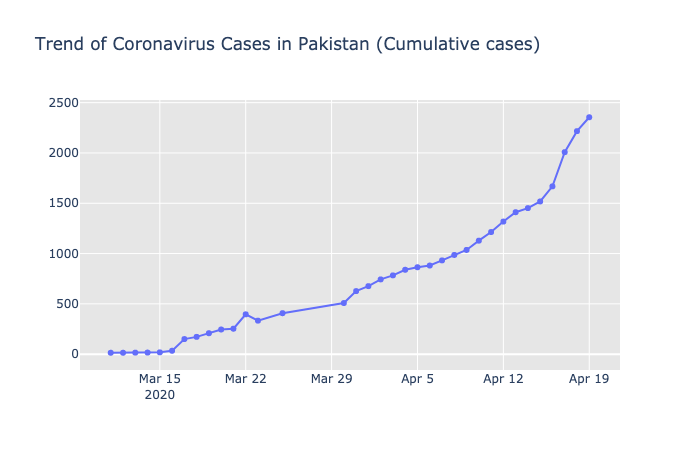

In [37]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=Final_Data_Pak['Date'].head(35),
                         y = Final_Data_Pak['ConfirmedCasesInPakistan'].head(35),
                         mode='lines+markers',
                         name='ConfirmedCasesInPakistan'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Pakistan (Cumulative cases)',
                  plot_bgcolor='rgb(230, 230, 230)')
fig.show("png")

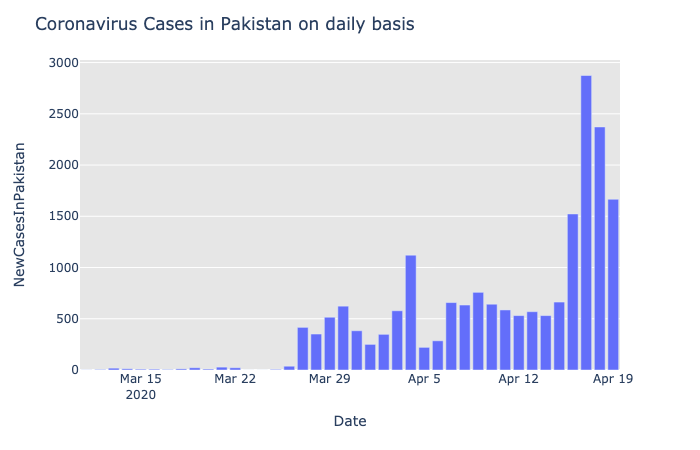

In [38]:
import plotly.express as px
fig = px.bar(Final_Data_Pak,
             x="Date",
             y="NewCasesInPakistan",
             barmode='group',
             height=400)
fig.update_layout(title_text='Coronavirus Cases in Pakistan on daily basis',
                  plot_bgcolor='rgb(230, 230, 230)')

fig.show("png")

**We will now compare Pakistan's Data with most effected cities like Wuhan. Are trends similar to Italy / S.Korea / Wuhan?**

We do have slight outdated data for the rest of the countries as we are eager to see trends, so it doesn't matter.

In [28]:
Path = 'COVID-Data-2020/per_day_cases.xlsx'
dbd_Italy = pd.read_excel(Path,parse_dates=True, sheet_name="Italy")
dbd_Korea = pd.read_excel(Path,parse_dates=True, sheet_name="Korea")
dbd_Wuhan = pd.read_excel(Path,parse_dates=True, sheet_name="Wuhan")

In [29]:
fig = px.bar(Final_Data_Pak, x="Date", y="ConfirmedCasesInPakistan", color='ConfirmedCasesInPakistan', orientation='v', height=600,
             title='Confirmed Cases in Pakistan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.write_image("figure.png", engine="kaleido")

fig = px.bar(dbd_Italy, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Italy', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.write_image("figure.png", engine="kaleido")

fig = px.bar(dbd_Korea, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in South Korea', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.write_image("figure.png", engine="kaleido")
fig = px.bar(dbd_Wuhan, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='Confirmed Cases in Wuhan', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.write_image("figure.png", engine="kaleido")

As these trends are the perfect example of exponential growth of this pandemic. These bars (Of Pakistan) look like we are heading towards a very bad situation, if rules and regulations are still not taken seriously.

Lets predict now

In [30]:
confirmed_cases = Final_Data_Pak.groupby('Date').sum()['ConfirmedCasesInPakistan'].reset_index()

In [31]:
confirmed_cases.columns = ['Date','Cases']
confirmed_cases['Date'] = pd.to_datetime(confirmed_cases['Date'])

In [32]:
confirmed_cases.tail()

,Date,Cases
35,2020-04-15,1518
36,2020-04-16,1668
37,2020-04-17,2008
38,2020-04-18,2217
39,2020-04-19,2355


## Arima Model Prediction

0 2 1
[2529.9206448542245, 2709.3043017827727, 2893.150970785644, 3081.4606518628384, 3274.233345014356, 3471.4690502401972, 3673.1677675403616, 3879.329496914849, 4089.9542383636604, 4305.041991886795, 4524.592757484253, 4748.606535156034, 4977.083324902138, 5210.023126722565, 5447.425940617316, 5689.29176658639, 5935.6206046297875, 6186.4124547475085, 6441.667316939553, 6701.38519120592]


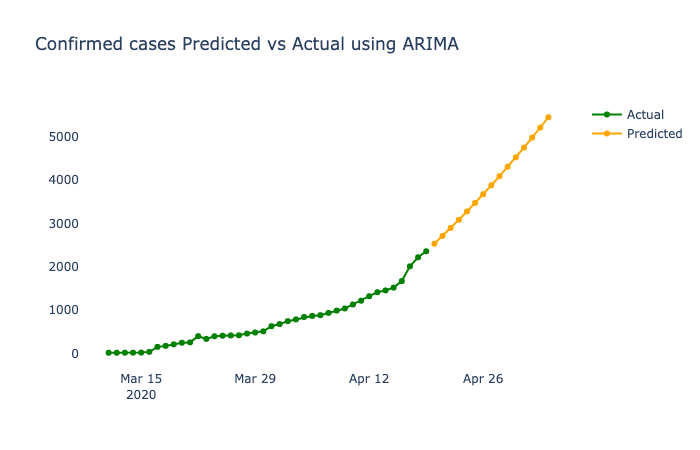

In [39]:
cc = confirmed_cases['Cases'].values


# fit model
p,d,q = auto_arima(cc).order
print(p,d,q)

#model = SARIMAX(chk, order=(p,d,q), seasonal_order=(0,0,0,0),measurement_error=True)#seasonal_order=(1, 1, 1, 1))
model = ARIMA(confirmed_cases['Cases'],order=(p,d,q))
arima = model.fit(disp=True)
forecast = arima.forecast(steps= 20)
pred = list(forecast[0])
print(pred)
start_date = confirmed_cases['Date'].max()
prediction_dates = []
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_cases['Date'], y=confirmed_cases['Cases'],
                    mode='lines+markers',marker_color='green',name='Actual'))
fig.add_trace(go.Scatter(x=prediction_dates, y=pred,
                    mode='lines+markers',marker_color='Orange',name='Predicted'))
fig.update_layout(title_text = 'Confirmed cases Predicted vs Actual using ARIMA')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=800, height=600)
fig.show("png")

## Sarima Model Prediction

0 2 1
[2526.84063531 2698.67354062 2870.50644593 3042.33935124 3214.17225655
 3386.00516186 3557.83806716 3729.67097247]


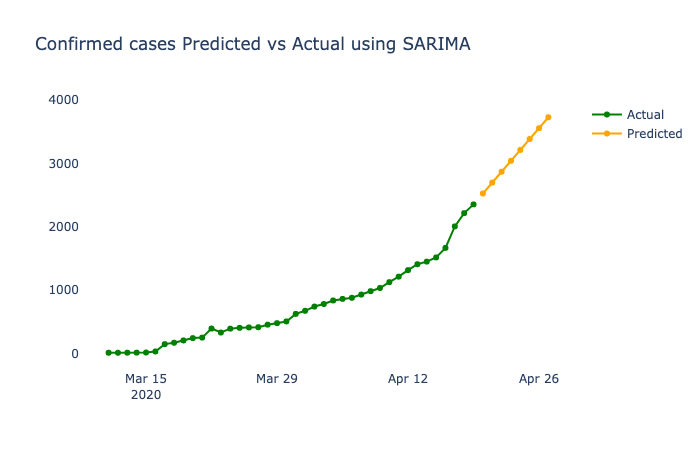

In [40]:
cc = confirmed_cases['Cases'].values


# fit model
p,d,q = auto_arima(cc).order
print(p,d,q)

model = SARIMAX(cc, order=(p,d,q), seasonal_order=(0,0,0,0),measurement_error=True)#seasonal_order=(1, 1, 1, 1))
model_fit = model.fit(disp=False)
        
# make prediction
pred = model_fit.predict(len(cc), len(cc)+7)
print(pred)
        
start_date = confirmed_cases['Date'].max()
prediction_dates = []
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date

fig = go.Figure()
fig.add_trace(go.Scatter(x=confirmed_cases['Date'], y=confirmed_cases['Cases'],
                    mode='lines+markers',marker_color='green',name='Actual'))
fig.add_trace(go.Scatter(x=prediction_dates, y=pred,
                    mode='lines+markers',marker_color='Orange',name='Predicted'))
fig.update_layout(title_text = 'Confirmed cases Predicted vs Actual using SARIMA')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',width=800, height=600)
fig.show("png")

## <center> -- END OF NOTEBOOK -- </center>